# Modeling

In [8]:
## Import all the libraries
import pandas as pd
import numpy as np

## Data Viz 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Transformation
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

## for statistical tests
from math import sqrt
import scipy
from scipy.fft import fft, fftfreq
import statistics
from statistics import mean
import statsmodels.api as sm
import statsmodels.formula.api as smf

## SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.svm import SVC

## Cluster Centroids
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans

## Modelling 
from sklearn import datasets, decomposition, ensemble, feature_selection, linear_model, metrics, model_selection, preprocessing, svm, tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, explained_variance_score, f1_score, mean_absolute_error, mean_squared_error, precision_score, r2_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, GridSearchCV, ShuffleSplit, train_test_split
from sklearn.calibration import calibration_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb

import shap

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import time

print('Libraries imported successfully')

ModuleNotFoundError: No module named 'xgboost'

# Data preprocessing steps

In [9]:
df = pd.read_csv('arrhythmia_preprocessed_cleaned_classes_label.csv')
# Separate features and target variable
X = df.drop(['class','label'], axis=1)  # Features
y = df['label']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save X train and X_test without PCA 
X_train_saved = X_train
X_test_saved = X_test
y_train_saved = y_train
y_test_saved = y_test

# PCA on training data set 
pca = PCA(n_components = 78)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train = X_train_pca
X_test = X_test_pca

print(pca.n_components_)

#SMOTE
#smo = SMOTE()
#X_train_sm, y_train_sm = smo.fit_resample(X_train, y_train)

#print("Shape of X_train resampled with smote:", X_train_sm.shape)
#print("Shape of y_train resampled with smote:", y_train_sm.shape)
#print('SMOTE :', dict(pd.Series(y_train_sm).value_counts()))



72


# Baseline modelling - logistic Regression, SVM, Random Forest

In [10]:
# Define classifiers with specified parameters
clf_lr = LogisticRegression(random_state=22, max_iter=2000)
clf_rf = RandomForestClassifier(random_state=22)
clf_svc = SVC(random_state=22)

# Define parameter grids for each classifier
param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000], 
                  'min_samples_leaf': [1, 3, 5], 
                  'max_features': ['sqrt', 'log2']}]
param_grid_svc = [{'kernel': ['rbf'], 'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 0, 4)},
                  {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]

param_grid_svc = [
    {'kernel': ['linear'], 'C': np.logspace(-4, 4, 5)}]


In [11]:
# Logistic Regression
print("\n--- Logistic Regression ---")
gcv_lr = GridSearchCV(clf_lr, param_grid_lr, cv=3, refit=True)
gcv_lr.fit(X_train, y_train)
print(f'Best parameters: {gcv_lr.best_params_}')
train_predictions_lr = gcv_lr.predict(X_train)
test_predictions_lr = gcv_lr.predict(X_test)
train_acc_lr = accuracy_score(y_train, train_predictions_lr)
test_acc_lr = accuracy_score(y_test, test_predictions_lr)
print(f'Training Accuracy: {train_acc_lr:.2f}')
print(f'Test Accuracy: {test_acc_lr:.2f}')


--- Logistic Regression ---
Best parameters: {'C': 0.0031622776601683794, 'solver': 'liblinear'}
Training Accuracy: 0.82
Test Accuracy: 0.75


In [12]:
# Random Forest
print("\n--- Random Forest ---")
gcv_rf = GridSearchCV(clf_rf, param_grid_rf, cv=3, refit=True)
gcv_rf.fit(X_train, y_train)
print(f'Best parameters: {gcv_rf.best_params_}')
train_predictions_rf = gcv_rf.predict(X_train)
test_predictions_rf = gcv_rf.predict(X_test)
train_acc_rf = accuracy_score(y_train, train_predictions_rf)
test_acc_rf = accuracy_score(y_test, test_predictions_rf)
print(f'Training Accuracy: {train_acc_rf:.2f}')
print(f'Test Accuracy: {test_acc_rf:.2f}')


--- Random Forest ---
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 100}
Training Accuracy: 1.00
Test Accuracy: 0.77


In [ ]:
# SVM
print("\n--- SVM ---")
gcv_svc = GridSearchCV(clf_svc, param_grid_svc, cv=3, refit=True)
gcv_svc.fit(X_train, y_train)
print(f'Best parameters: {gcv_svc.best_params_}')
train_predictions_svc = gcv_svc.predict(X_train)
test_predictions_svc = gcv_svc.predict(X_test)
train_acc_svc = accuracy_score(y_train, train_predictions_svc)
test_acc_svc = accuracy_score(y_test, test_predictions_svc)
print(f'Training Accuracy: {train_acc_svc:.2f}')
print(f'Test Accuracy: {test_acc_svc:.2f}')

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
train_accuracies = [train_acc_lr, train_acc_rf, train_acc_svc]
test_accuracies = [test_acc_lr, test_acc_rf, test_acc_svc]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='skyblue', label='Training Accuracy')
plt.bar(models, test_accuracies, color='salmon', alpha=0.7, label='Test Accuracy')
plt.title('Comparison of Model Accuracies', fontsize=14)
#plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(models, fontsize=14, rotation=45)  # Set font size for model labels and rotate them
plt.tight_layout()
plt.savefig('LR_RF_SVM_comparison_1.png')
plt.show()

In [ ]:
# Define the best-performing model with its best parameters
best_model = LogisticRegression(C=0.0031622776601683794, solver='liblinear')  # Example for logistic regression

# Fit the model
best_model.fit(X_train, y_train)

# Make predictions
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)
test_probabilities = best_model.predict_proba(X_test)

# Evaluate performance metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

y_pred_proba = best_model.predict_proba(X_test)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Define the best-performing model with its best parameters
best_model = LogisticRegression(C=0.0031622776601683794, solver='liblinear')  # Example for logistic regression

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


In [ ]:
y_true = y_test
y_pred = test_predictions

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels', fontsize=14)
    plt.ylabel('True labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True) 
    plt.gca().spines['bottom'].set_visible(True) 
    plt.gca().spines['left'].set_visible(True)
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred_proba):
    y_pred_proba_pos = y_pred_proba[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba_pos)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve', fontsize=14)
    plt.tight_layout()
    plt.savefig('precision_recall_curve.png')
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_pred_proba):
    y_pred_proba_pos = y_pred_proba[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba_pos)
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve', fontsize=14)
    plt.tight_layout()
    plt.savefig('roc_curve.png')
    plt.show()

# Histogram of Predicted Probabilities
def plot_predicted_probabilities(y_pred_proba):
    plt.hist(y_pred_proba, bins=20)
    plt.xlabel('Predicted Probability', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Histogram of Predicted Probabilities', fontsize=14)
    plt.tight_layout()
    plt.savefig('predicted_probabilities_histogram.png')
    plt.show()

plot_confusion_matrix(y_true, y_pred)
#plot_precision_recall_curve(y_true, y_pred_proba)
#plot_roc_curve(y_true, y_pred_proba)
#plot_predicted_probabilities(y_pred_proba)


# Nested cross validation

In [ ]:
# Nested cross validation 

clf_lr = LogisticRegression(random_state=22, max_iter=2000)
clf_rf = RandomForestClassifier(random_state=22)
clf_svc = SVC(random_state=22)


param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}

param_grid_rf = [{'n_estimators': [ 100, 250], 
                  'min_samples_leaf': [1, 3, 5], 
                  'max_features': ['sqrt']}]

param_grid_svc = [{'kernel': ['rbf'], 'C': np.logspace(-1, 1, 9), 'gamma': np.logspace(-1, 0, 1)},
                 {'kernel': ['linear'], 'C': np.logspace(-1, 1, 9)}]

                   #'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 0, 4)},
#                  {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]
#param_grid_svc = [
#    {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]
                  
gridcvs = {}

for pgrid, clf, name in zip((param_grid_lr, param_grid_rf, param_grid_svc),
                            (clf_lr, clf_rf, clf_svc),
                            ('LogisticRegression', 'Random Forest', 'SVM')):
    gcv = GridSearchCV(clf, pgrid, cv=3, refit=True)
    gridcvs[name] = gcv

outer_cv = StratifiedKFold(n_splits=5, shuffle=True)
outer_scores = {}

for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, X_train, y_train, cv=outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')


In [ ]:
final_clf = gridcvs['LogisticRegression']
final_clf.fit(X_train, y_train)

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=final_clf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')


# Extract mean accuracy scores and standard deviations
mean_scores = [np.mean(scores) for scores in outer_scores.values()]
std_scores = [np.std(scores) for scores in outer_scores.values()]
models = list(outer_scores.keys())

models = ['Logistic Regression', 'Random Forest', 'SVM']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, yerr=std_scores, capsize=8, color=['darkslategrey', 'lightblue', 'navy'])
plt.title('Nested Cross-Validation Performance', fontsize=14)
#plt.xlabel('Model')
plt.ylabel('Mean Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(models, fontsize=14, rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Model Testing

# Define Classifiers and parameters

In [11]:
# Define classifiers with specified parameters
clf_lr = LogisticRegression(random_state=22, max_iter=2000)
clf_rf = RandomForestClassifier(random_state=22)
clf_svc = SVC(random_state=22)
clf_en = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)
clf_gb = GradientBoostingClassifier(random_state=42)
clf_ada = AdaBoostClassifier()
clf_xgb = xgb.XGBClassifier()


# Define parameter grids for each classifier
param_grid_lr = [{'C': [c], 'penalty': [penalty]} for c in np.logspace(-4, 2, 9) for penalty in ['l1', 'l2']]

param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000], 
                  'min_samples_leaf': [1, 3, 5], 
                  'max_features': ['sqrt', 'log2']}]

param_grid_svc = {'C': np.logspace(-4, 2, 9), 'kernel': ['linear', 'rbf']}
param_grid_svc_list = [{'C': [c], 'kernel': [kernel]} for c in np.logspace(-4, 2, 9) for kernel in ['linear', 'rbf']]

param_grid_en = {'C': np.logspace(-4, 2, 9), 'l1_ratio': np.linspace(0.1, 0.9, 9)}
param_grid_en_list = [{'C': [C], 'l1_ratio': [l1_ratio]} for C in np.logspace(-4, 2, 9) for l1_ratio in np.linspace(0.1, 0.9, 9)]


param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]}
param_grid_gb_list = [{'n_estimators': [n_estimators], 'learning_rate': [learning_rate], 'max_depth': [max_depth]} 
                                 for n_estimators in [50, 100, 200] 
                                 for learning_rate in [0.01, 0.1, 1.0] 
                                 for max_depth in [3, 5, 7]]

param_grid_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
param_grid_ada_list = [{'n_estimators': [n_estimators], 'learning_rate': [learning_rate]} 
                       for n_estimators in [50, 100, 200] 
                       for learning_rate in [0.01, 0.1, 1.0]]

param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]}
param_grid_xgb_list = [{'n_estimators': [n_estimators], 'learning_rate': [learning_rate], 'max_depth': [max_depth]} 
                       for n_estimators in [50, 100, 200] 
                       for learning_rate in [0.01, 0.1, 1.0] 
                       for max_depth in [3, 5, 7]]

print('parameters set')

parameters set


# Model Training Function with Progress Bar and Score Output

In [12]:
# Define train_model function
def train_model(clf, param_grid, X_train, y_train, X_test, y_test):
    # Initialize GridSearchCV with the classifier and parameter grid
    gcv = GridSearchCV(clf, param_grid, cv=3, refit=True)

    # Calculate total number of iterations for progress bar
    total_iterations = len(param_grid) * 3

    # Train the model with tqdm progress bar
    with tqdm(total=total_iterations, desc="Training Progress") as pbar:
        for params in param_grid:
            for fold in range(3):
                # Update progress bar
                pbar.update(1)

                # Set parameters individually
                for param_name, param_value in params.items():
                    setattr(clf, param_name, param_value)

                # Train the model
                gcv.fit(X_train, y_train)

    # Make predictions
    train_predictions = gcv.predict(X_train)
    test_predictions = gcv.predict(X_test)

    # Calculate evaluation metrics
    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)
    train_precision = precision_score(y_train, train_predictions)
    test_precision = precision_score(y_test, test_predictions)
    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)
    train_f1 = f1_score(y_train, train_predictions)
    test_f1 = f1_score(y_test, test_predictions)

# Calculate AUROC scores
    train_auroc = roc_auc_score(y_train, train_predictions)
    test_auroc = roc_auc_score(y_test, test_predictions)     

# Return model performance metrics
    return {
        'model': type(clf).__name__,
        'best_params': gcv.best_params_,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1,
        'train_auroc': train_auroc,
        'test_auroc': test_auroc,
        'test_predictions': test_predictions
    }

print('function defined')

function defined


In [13]:
# Define a function to print the results in a readable format
def print_results(results):
    print(f"Model: {results['model']}")
    print(f"Best Parameters: {results['best_params']}")
    print("Training Metrics:")
    print(f"  Accuracy: {results['train_accuracy']:.2f}")
    print(f"  Precision: {results['train_precision']:.2f}")
    print(f"  Recall: {results['train_recall']:.2f}")
    print(f"  F1-score: {results['train_f1']:.2f}")
    print(f"  Auroc-score: {results['train_auroc']:.2f}")    
    print("Test Metrics:")
    print(f"  Accuracy: {results['test_accuracy']:.2f}")
    print(f"  Precision: {results['test_precision']:.2f}")
    print(f"  Recall: {results['test_recall']:.2f}")
    print(f"  F1-score: {results['test_f1']:.2f}")
    print(f"  Auroc-score: {results['test_auroc']:.2f}")    
    print()

print('function defined')

# FYI for reffering back to scores later: 
# Access logistic regression recall score for testing
#lr_test_recall = lr_results['test_recall']
# Now you can use lr_test_recall for further analysis or comparison
#print("Logistic Regression Recall Score for Testing:", lr_test_recall)

function defined


# Logistic Regression

In [14]:
# run the train model function for lr
lr_results = train_model(clf_lr, param_grid_lr, X_train, y_train, X_test, y_test)
# print the results
print_results(lr_results)

Training Progress: 100%|██████████| 54/54 [00:59<00:00,  1.10s/it]

Model: LogisticRegression
Best Parameters: {'C': 0.0031622776601683794, 'penalty': 'l2'}
Training Metrics:
  Accuracy: 0.81
  Precision: 0.87
  Recall: 0.68
  F1-score: 0.76
  Auroc-score: 0.80
Test Metrics:
  Accuracy: 0.74
  Precision: 0.90
  Recall: 0.55
  F1-score: 0.68
  Auroc-score: 0.74



# Random Forest

In [15]:
# run the train model function for rf
rf_results = train_model(clf_rf, param_grid_rf, X_train, y_train, X_test, y_test)
# print the results
print_results(rf_results)

Training Progress: 100%|██████████| 3/3 [05:15<00:00, 105.10s/it]

Model: RandomForestClassifier
Best Parameters: {'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 500}
Training Metrics:
  Accuracy: 0.98
  Precision: 1.00
  Recall: 0.95
  F1-score: 0.97
  Auroc-score: 0.97
Test Metrics:
  Accuracy: 0.73
  Precision: 0.82
  Recall: 0.60
  F1-score: 0.69
  Auroc-score: 0.73



# SVM

In [16]:
# run the train model function for svc
svc_results = train_model(clf_svc, param_grid_svc_list, X_train, y_train, X_test, y_test)
# print the results
print_results(svc_results)

Training Progress: 100%|██████████| 54/54 [21:54<00:00, 24.34s/it]

Model: SVC
Best Parameters: {'C': 0.0031622776601683794, 'kernel': 'linear'}
Training Metrics:
  Accuracy: 0.81
  Precision: 0.88
  Recall: 0.66
  F1-score: 0.75
  Auroc-score: 0.79
Test Metrics:
  Accuracy: 0.76
  Precision: 0.90
  Recall: 0.60
  F1-score: 0.72
  Auroc-score: 0.76



# ElasticNet

In [17]:
# run the train model function for elasticnet
en_results = train_model(clf_en, param_grid_en_list, X_train, y_train, X_test, y_test)
# print the results
print_results(en_results)

Training Progress: 100%|██████████| 243/243 [7:28:51<00:00, 110.83s/it]

Model: LogisticRegression
Best Parameters: {'C': 0.01778279410038923, 'l1_ratio': 0.1}
Training Metrics:
  Accuracy: 0.82
  Precision: 0.86
  Recall: 0.71
  F1-score: 0.78
  Auroc-score: 0.81
Test Metrics:
  Accuracy: 0.73
  Precision: 0.82
  Recall: 0.60
  F1-score: 0.69
  Auroc-score: 0.73



# Gradientboost

In [18]:
# run the train model function for gradientboost
gb_results = train_model(clf_gb, param_grid_gb_list, X_train, y_train, X_test, y_test)
# print the results
print_results(gb_results)

Training Progress: 100%|██████████| 81/81 [1:27:12<00:00, 64.60s/it]

Model: GradientBoostingClassifier
Best Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100}
Training Metrics:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Auroc-score: 1.00
Test Metrics:
  Accuracy: 0.73
  Precision: 0.81
  Recall: 0.62
  F1-score: 0.70
  Auroc-score: 0.73



# Adaboost

In [19]:
# run the train model function for adaboost
ada_results = train_model(clf_ada, param_grid_ada_list, X_train, y_train, X_test, y_test)
# print the results
print_results(ada_results)

Training Progress: 100%|██████████| 27/27 [06:19<00:00, 14.07s/it]

Model: AdaBoostClassifier
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Training Metrics:
  Accuracy: 0.73
  Precision: 0.71
  Recall: 0.67
  F1-score: 0.69
  Auroc-score: 0.72
Test Metrics:
  Accuracy: 0.64
  Precision: 0.69
  Recall: 0.53
  F1-score: 0.60
  Auroc-score: 0.64



# XGBoost

In [20]:
# run the train model function for xgboost
xgb_results = train_model(clf_xgb, param_grid_xgb_list, X_train, y_train, X_test, y_test)
# print the results
print_results(xgb_results)

Training Progress: 100%|██████████| 81/81 [33:51<00:00, 25.09s/it]

Model: XGBClassifier
Best Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100}
Training Metrics:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Auroc-score: 1.00
Test Metrics:
  Accuracy: 0.74
  Precision: 0.79
  Recall: 0.66
  F1-score: 0.72
  Auroc-score: 0.74



# Model Comparison

In [21]:
# Define model names and their corresponding results
models = ['Log Regression', 'Random Forest', 'SVM', 'ElasticNet', 'AdaBoost', 'GradientBoost', 'XGBoost']
results = [lr_results, rf_results, svc_results, en_results, ada_results, gb_results, xgb_results]

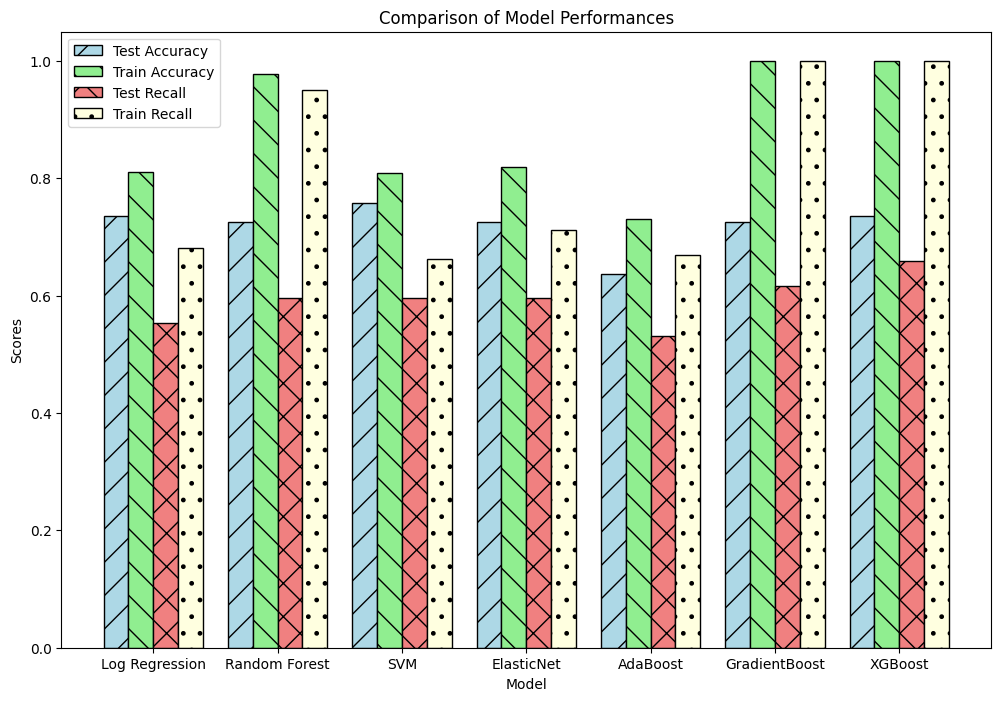

In [22]:
# Extract test and train accuracy scores for each model
test_accuracies = [result['test_accuracy'] for result in results]
train_accuracies = [result['train_accuracy'] for result in results]

# Extract test and train recall scores for each model
test_recalls = [result['test_recall'] for result in results]
train_recalls = [result['train_recall'] for result in results]

# Bar width
bar_width = 0.2
index = np.arange(len(models))

# Plotting
plt.figure(figsize=(12, 8))

# Plot test accuracy
plt.bar(index, test_accuracies, bar_width, color='lightblue', edgecolor='black', hatch='/', label='Test Accuracy')
# Plot train accuracy
plt.bar(index + bar_width, train_accuracies, bar_width, color='lightgreen', edgecolor='black', hatch='\\', label='Train Accuracy')

# Plot test recall
plt.bar(index + 2*bar_width, test_recalls, bar_width, color='lightcoral', edgecolor='black', hatch='x', label='Test Recall')
# Plot train recall
plt.bar(index + 3*bar_width, train_recalls, bar_width, color='lightyellow', edgecolor='black', hatch='.', label='Train Recall')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Model Performances')
plt.xticks(index + 1.5*bar_width, models)
plt.legend()
plt.show()

# AUROC for best performing models

In [23]:
# Define model names and their corresponding results
models = ['Log Regression', 'Random Forest', 'SVM', 'ElasticNet', 'AdaBoost', 'GradientBoost', 'XGBoost']
results = [lr_results, rf_results, svc_results, en_results, ada_results, gb_results, xgb_results]

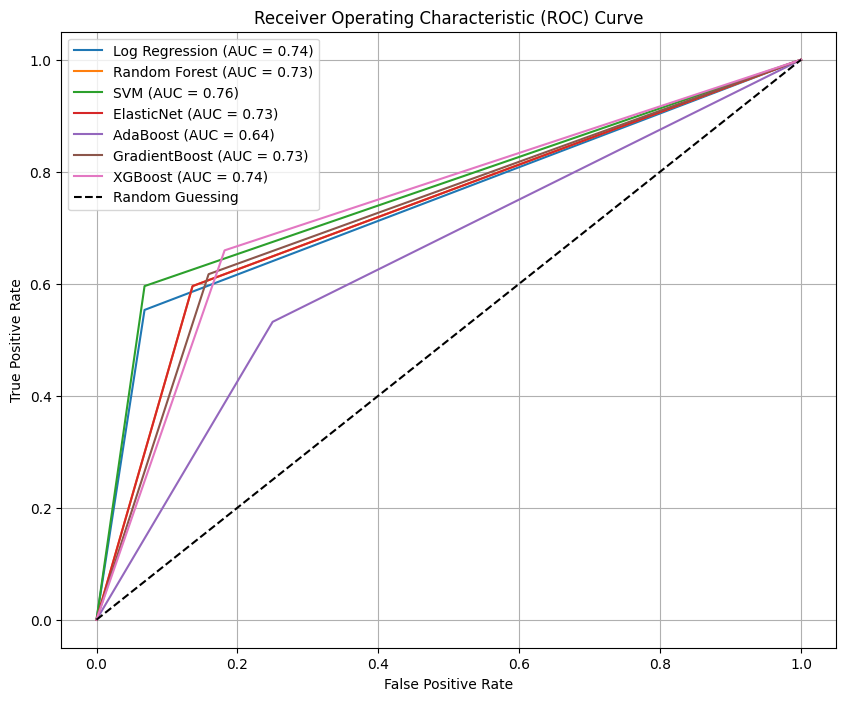

In [24]:
# Define model names and their corresponding results
models = ['Log Regression', 'Random Forest', 'SVM', 'ElasticNet', 'AdaBoost', 'GradientBoost', 'XGBoost']
results = [lr_results, rf_results, svc_results, en_results, ada_results, gb_results, xgb_results]


# Plotting ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, result in zip(models, results):
    # Compute ROC curve for test data
    fpr, tpr, _ = roc_curve(y_test, result['test_predictions'])
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["test_auroc"]:.2f})')

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()